In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [2]:
store_data = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
feature_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip')
sample_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')
train_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
test_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')

In [3]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
new_feature_data= feature_data[['Store','Date','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday']]

In [5]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
store_data['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [7]:
store_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [8]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

<AxesSubplot:ylabel='Weekly_Sales'>

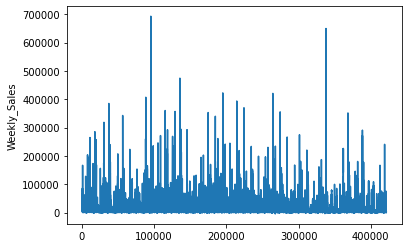

In [10]:
sns.lineplot(data=train_data,x=train_data.index, y="Weekly_Sales")

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

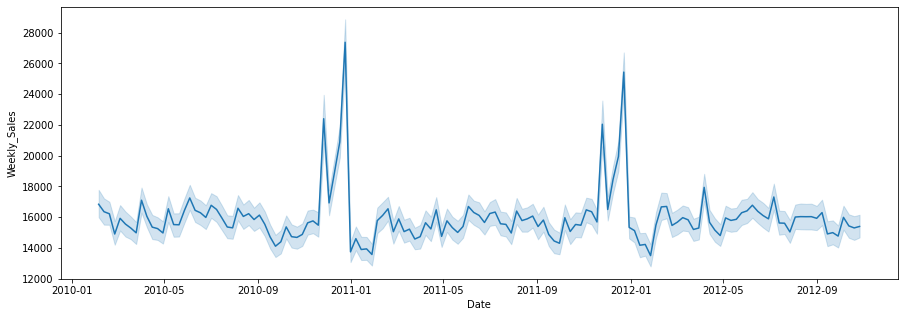

In [11]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=train_data,x=pd.to_datetime(train_data['Date']), y="Weekly_Sales")

Walmart saleprice increases dramatically starts from October and December. 

In [12]:
feature_train_data=pd.merge(new_feature_data, train_data)
merged_data = pd.merge(feature_train_data, store_data)
merged_data.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315


In [13]:
merged_data['Type'].replace({'A': 1, 'B': 2,'C':3},inplace=True)
merged_data['Date']=pd.to_datetime(merged_data['Date'])
merged_data['Day']= pd.to_datetime(merged_data['Date']).dt.day
merged_data['Week']= pd.to_datetime(merged_data['Date']).dt.week
merged_data['Year']= pd.to_datetime(merged_data['Date']).dt.year
merged_data.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Day,Week,Year
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,24924.50,1,151315,5,5,2010
1,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2,50605.27,1,151315,5,5,2010
2,1,2010-02-05,42.31,2.572,211.096358,8.106,False,3,13740.12,1,151315,5,5,2010
3,1,2010-02-05,42.31,2.572,211.096358,8.106,False,4,39954.04,1,151315,5,5,2010
4,1,2010-02-05,42.31,2.572,211.096358,8.106,False,5,32229.38,1,151315,5,5,2010


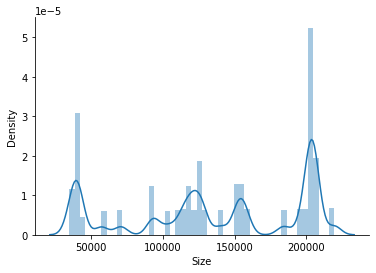

In [14]:
sns.distplot(merged_data['Size'])
sns.despine()

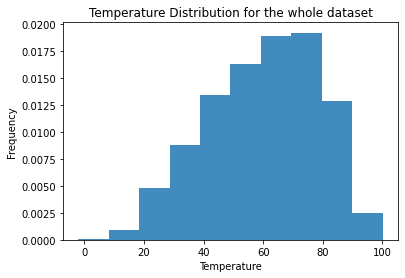

In [15]:
merged_data.Temperature.plot.hist(density=True, alpha=0.85);
plt.xlabel('Temperature');
plt.title('Temperature Distribution for the whole dataset');
plt.show()

Hottest Store( Store with highest temperature)

In [16]:
merged_data[merged_data['Temperature'] == merged_data['Temperature'].max()]['Store'].unique()

array([33])

Coolest Store (Store with coolest temperature)

In [17]:
merged_data[merged_data['Temperature'] == merged_data['Temperature'].min()]['Store'].unique()

array([7])

Text(0.5, 1.0, 'Coolest Store vs. Hootest Store')

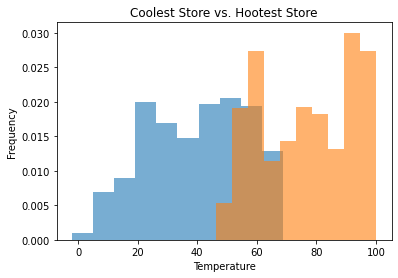

In [18]:
merged_data.loc[merged_data.Store==7, 'Temperature'].plot.hist(label='Store 7', density=True, alpha=.6)
merged_data.loc[merged_data.Store==33, 'Temperature'].plot.hist(label='Store 33', density=True, alpha=.6)
plt.xlabel('Temperature')
plt.title("Coolest Store vs. Hootest Store")

Customer comes to store more often when the temperature is high

Text(0.5, 1.0, 'Fuel Price')

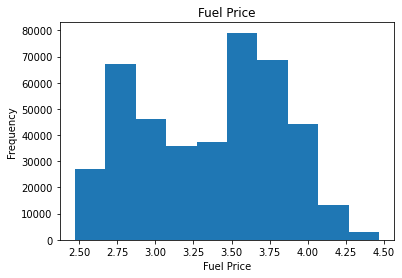

In [19]:
merged_data['Fuel_Price'].plot.hist()
plt.xlabel('Fuel Price')
plt.title('Fuel Price')

<AxesSubplot:xlabel='Date', ylabel='Fuel_Price'>

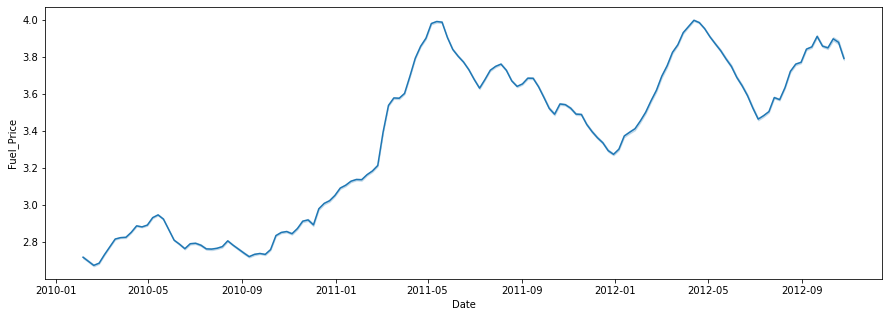

In [20]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=merged_data,x='Date', y="Fuel_Price")

Fuel Price keeps increasing over the year

<AxesSubplot:xlabel='Date', ylabel='Unemployment'>

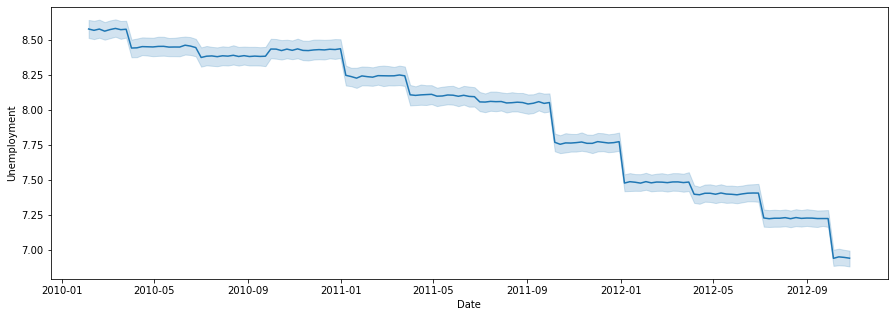

In [21]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=merged_data,x='Date', y="Unemployment")

Unemployment rate decrease over the year

Merge store data and train data

In [22]:
store_train_data=pd.merge(train_data, store_data)
store_train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

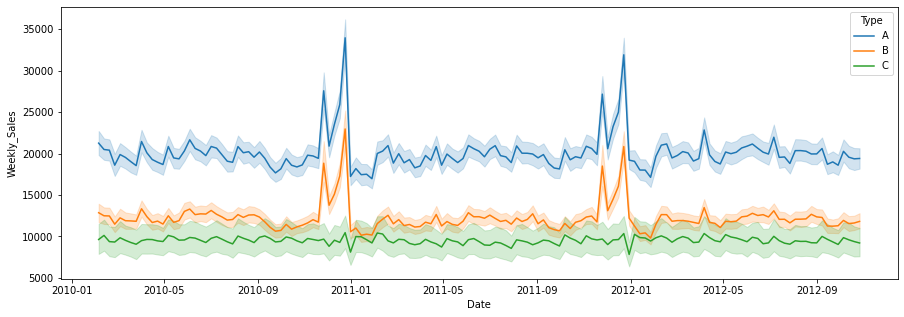

In [23]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=store_train_data,x=pd.to_datetime(store_train_data['Date']), y="Weekly_Sales", hue='Type')

In [24]:
store_train_data['Type'].replace({'A': 1, 'B': 2,'C':3},inplace=True)
store_train_data['Date']=pd.to_datetime(store_train_data['Date'])
store_train_data['Day']= pd.to_datetime(store_train_data['Date']).dt.day
store_train_data['Week']= pd.to_datetime(store_train_data['Date']).dt.week
store_train_data['Year']= pd.to_datetime(store_train_data['Date']).dt.year
store_train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Day,Week,Year
0,1,1,2010-02-05,24924.50,False,1,151315,5,5,2010
1,1,1,2010-02-12,46039.49,True,1,151315,12,6,2010
2,1,1,2010-02-19,41595.55,False,1,151315,19,7,2010
3,1,1,2010-02-26,19403.54,False,1,151315,26,8,2010
4,1,1,2010-03-05,21827.90,False,1,151315,5,9,2010


In [25]:
weekly_sales_2010= store_train_data[store_train_data['Year']==2010]['Weekly_Sales'].groupby(store_train_data['Week']).mean()
weekly_sales_2011= store_train_data[store_train_data['Year']==2011]['Weekly_Sales'].groupby(store_train_data['Week']).mean()
weekly_sales_2012= store_train_data[store_train_data['Year']==2012]['Weekly_Sales'].groupby(store_train_data['Week']).mean()

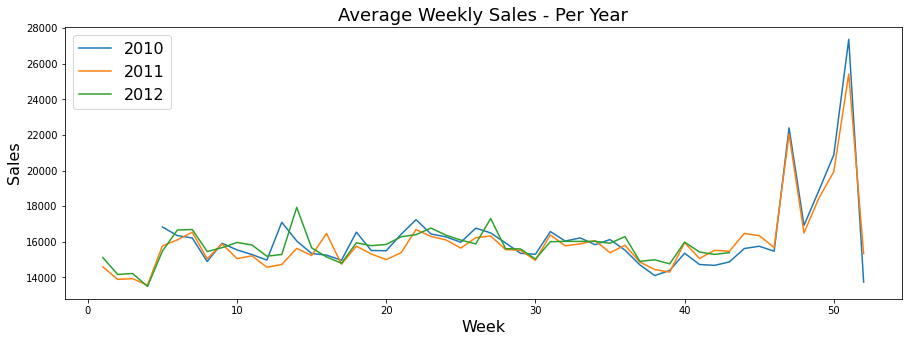

In [26]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

Merge store data and test data

In [27]:
store_test_data=pd.merge(test_data, store_data)
store_test_data.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [28]:
store_test_data['Type'].replace({'A': 1, 'B': 2,'C':3},inplace=True)
store_test_data['Date']=pd.to_datetime(store_test_data['Date'])
store_test_data['Day']= pd.to_datetime(store_test_data['Date']).dt.day
store_test_data['Week']= pd.to_datetime(store_test_data['Date']).dt.week
store_test_data['Year']= pd.to_datetime(store_test_data['Date']).dt.year
store_test_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,Day,Week,Year
0,1,1,2012-11-02,False,1,151315,2,44,2012
1,1,1,2012-11-09,False,1,151315,9,45,2012
2,1,1,2012-11-16,False,1,151315,16,46,2012
3,1,1,2012-11-23,True,1,151315,23,47,2012
4,1,1,2012-11-30,False,1,151315,30,48,2012


In [29]:
X=store_train_data.loc[:, store_train_data.columns!='Weekly_Sales'].drop('Date', axis=1)
Y=store_train_data.loc[:, store_train_data.columns=='Weekly_Sales']

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = RandomForestRegressor()
model.fit(X, Y)

RandomForestRegressor()

In [32]:
store_test_data['Weekly_Sales'] = model.predict(store_test_data.drop('Date',axis=1))

In [33]:
store_test_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,Day,Week,Year,Weekly_Sales
0,1,1,2012-11-02,False,1,151315,2,44,2012,35637.0634
1,1,1,2012-11-09,False,1,151315,9,45,2012,20656.7663
2,1,1,2012-11-16,False,1,151315,16,46,2012,19543.7771
3,1,1,2012-11-23,True,1,151315,23,47,2012,20389.3778
4,1,1,2012-11-30,False,1,151315,30,48,2012,27340.4065


In [34]:
sample_data['Weekly_Sales']=store_test_data['Weekly_Sales']

In [35]:
sample_data.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,35637.0634
1,1_1_2012-11-09,20656.7663
2,1_1_2012-11-16,19543.7771
3,1_1_2012-11-23,20389.3778
4,1_1_2012-11-30,27340.4065


In [36]:
sample_data.to_csv('submission.csv',index=False)
sample_data

,Id,Weekly_Sales
0,1_1_2012-11-02,35637.0634
1,1_1_2012-11-09,20656.7663
2,1_1_2012-11-16,19543.7771
3,1_1_2012-11-23,20389.3778
4,1_1_2012-11-30,27340.4065
...,...,...
115059,45_98_2013-06-28,666.9722
115060,45_98_2013-07-05,680.5260
115061,45_98_2013-07-12,738.3751
115062,45_98_2013-07-19,780.1112
